# Quantum_fitter

This notebook shows you how to use the quantum_fitter. The purpose of quantum_fitter is to provide a uniform, easy-to-use fitting protocol, that everyone can share and extend. 

Quantum_fitter builds on the lmfit package https://lmfit.github.io/lmfit-py/

To use the quantum_fitter package, you initialize an instance with your x-data, y-data, and the models you want to fit to as well as the initial guesses for parameters:

In [1]:
import quantum_fitter as qf
import numpy as np

First we generate some data we can fitt

In [2]:
def gaussian(x, amp, cen, wid):
    return (amp / (np.sqrt(2*np.pi) * wid)) * np.exp(-(x-cen)**2 / (2*wid**2))

# Generate random number from gaussian distribution
x = np.linspace(0, 10, 500)
y = gaussian(x, 8, 5, 0.6) + np.random.randn(500) * 0.5

### Chosse model and give initial guess
Then we specify the model we want to use and the initial guess. In this example we use the 'GaussianModel' which is shipped with lmfit.

In [3]:
params_ini = {'amplitude': 5,
              'center': 5,
              'sigma': 1}
qfit = qf.QFit(x, y,'GaussianModel', params_ini)

#### To fit
To perform the actual fit we call do_fit()

In [4]:
qfit.do_fit()

We can inspect the result

In [5]:
qfit.result

Finally we can  plot the result

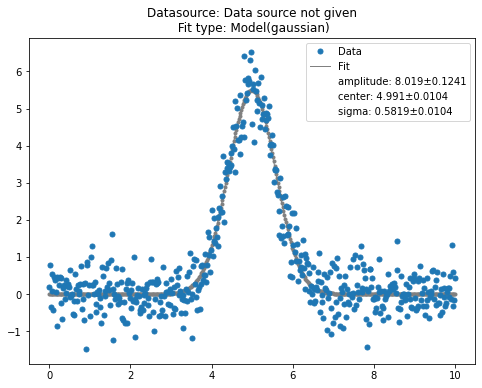

In [6]:
plot_settings = {
    'x_label': 'Time (us)',
    'y_label': 'Voltage (mV)',
    'plot_title': 'datasource',
    'fit_color': 'C4',
    'fig_size': (8, 6)}
qfit.pretty_print()

To print the resulting plot to a pdf, use `pdf_print`:

In [7]:
#qfit.pdf_print('qfit.pdf')

## Two models on top of each other

We add a linear term to the gausian data.  

In [8]:
y = y + 0.5*x

/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/lmfit/lineshapes.py:493: RuntimeWarning: invalid value encountered in multiply
  return slope * x + intercept
/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:423: RuntimeWarning: invalid value encountered in subtract
  lower_dist = x - lb
/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:556: RuntimeWarning: invalid value encountered in double_scalars
  dx = x[i] - x0[i]  # Recompute dx as exactly representable number.
/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/lmfit/minimizer.py:375: RuntimeWarning: invalid value encountered in double_scalars
  _neg2_log_likel = self.ndata * np.log(self.chisqr / self.ndata)
/opt/hostedtoolcache/Python/3.7.12/x64/lib/python3.7/site-packages/lmfit/minimizer.py:377: RuntimeWarning: divide by zero encountered in log
  self.bic = _neg2_log_likel + np.log(self.ndata) * self.nv

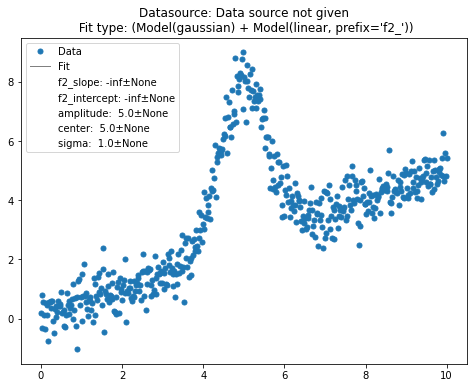

In [9]:
params_ini = {'intercept': 0,
              'slope': 0.5,
              'amplitude': 5,
              'center': 5,
              'sigma': 1}
qfit = qf.QFit(x, y,['GaussianModel', 'LinearModel'], params_ini)
qfit.do_fit()
qfit.pretty_print()

To get the fit parameters' results, we can use qfit.fit_params, qfit.err_params. The method qfit.fit_values returns the y-data from the fit.

In [10]:
f_p = qfit.fit_params() # return dictionary with all the fitting parameters 
f_e = qfit.err_params('amplitude') # return float of amplitude's fitting stderr
y_fit = qfit.fit_values()

In [11]:
qfit.params

{'amplitude': 5, 'center': 5, 'sigma': 1, 'f2_slope': -inf, 'f2_intercept': -inf, 'fwhm': 2.35482, 'height': 1.9947115000000002, 'intercept': 0, 'slope': 0.5}


{'amplitude': 5,
 'center': 5,
 'sigma': 1,
 'f2_slope': -inf,
 'f2_intercept': -inf,
 'fwhm': 2.35482,
 'height': 1.9947115000000002,
 'intercept': 0,
 'slope': 0.5}

### Or we can use our own modification function

In [12]:
y2 = gaussian(x, 8, 2, 0.6) + gaussian(x, 5, 7.4, 0.3)+ np.random.randn(500) * 0.5

In [13]:
def double_gaussian(x, amp, cen_1, cen_2, wid):
    return gaussian(x, amp, cen_1, wid) + gaussian(x, amp,cen_2, wid)

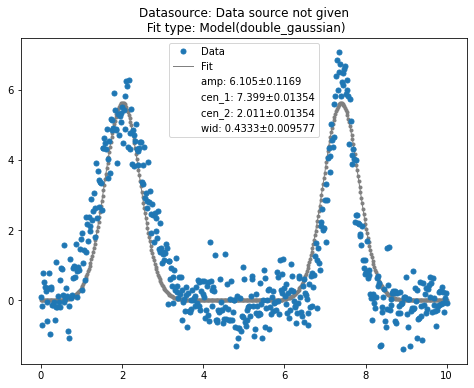

In [14]:
params_ini = {'amplitude': 5,
              'center': 5,
              'sigma': 1}
qfit = qf.QFit(x, y2,double_gaussian, [5, 5, 6, 1])
qfit.do_fit()
qfit.pretty_print()

### smooth the data
If need to smooth the data beforehand, use `qfit.wash()` to [filter the spikes](https://docs.scipy.org/doc/scipy/reference/signal.html).

In [15]:
qfit.wash(method='savgol', window_length=5, polyorder=1)

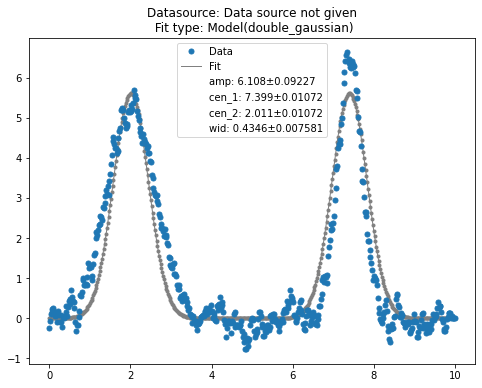

In [16]:
qfit.do_fit()
qfit.pretty_print()

# Appendix A: The build-in function list
**Peak-like models**, for more models, [tap here](https://lmfit.github.io/lmfit-py/builtin_models.html).

To obtain the parameters in the models, use ```qf.params('GaussianModel')``` to get.

[GaussianModel](https://lmfit.github.io/lmfit-py/builtin_models.html#gaussianmodel)

[LorentzianModel](https://lmfit.github.io/lmfit-py/builtin_models.html#lorentzianmodel)

[SplitLorentzianModel](https://lmfit.github.io/lmfit-py/builtin_models.html#splitlorentzianmodel)

[VoigtModel](https://lmfit.github.io/lmfit-py/builtin_models.html#voigtmodel)

[PseudoVoigtModel](https://lmfit.github.io/lmfit-py/builtin_models.html#pseudovoigtmodel)

[MoffatModel](https://lmfit.github.io/lmfit-py/builtin_models.html#moffatmodel)

[Pearson7Model](https://lmfit.github.io/lmfit-py/builtin_models.html#pearson7model)

[StudentsTModel](https://lmfit.github.io/lmfit-py/builtin_models.html#studentstmodel)

[BreitWignerModel](https://lmfit.github.io/lmfit-py/builtin_models.html#breitwignermodel)

[LognormalModel](https://lmfit.github.io/lmfit-py/builtin_models.html#lognormalmodel)

[DampedOscillatorModel](https://lmfit.github.io/lmfit-py/builtin_models.html#dampedoscillatormodel)

[DampedHarmonicOscillatorModel](https://lmfit.github.io/lmfit-py/builtin_models.html#dampedharmonicoscillatormodel)

[ExponentialGaussianModel](https://lmfit.github.io/lmfit-py/builtin_models.html#exponentialgaussianmodel)

[SkewedGaussianModel](https://lmfit.github.io/lmfit-py/builtin_models.html#skewedgaussianmodel)

[SkewedVoigtModel](https://lmfit.github.io/lmfit-py/builtin_models.html#skewedvoigtmodel)

[ThermalDistributionModel](https://lmfit.github.io/lmfit-py/builtin_models.html#thermaldistributionmodel)

[DoniachModel](https://lmfit.github.io/lmfit-py/builtin_models.html#doniachmodel)

